In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
from PIL import Image
from scipy import ndimage

In [71]:
from scipy.ndimage import convolve,correlate,gaussian_filter,sobel

In [39]:
b2_rgb = imageio.imread('blackboard/2.jpg')
b2 = imageio.imread('blackboard/2.jpg', pilmode='L')

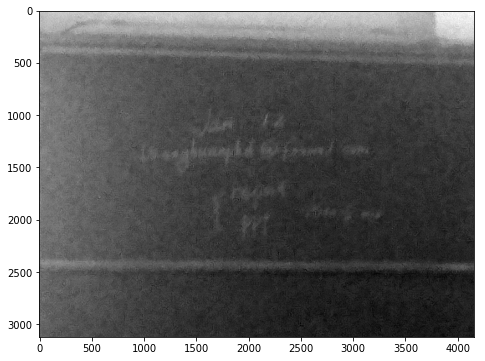

In [42]:
plt.figure(figsize=(8,6))
plt.imshow(b2,cmap='gray')

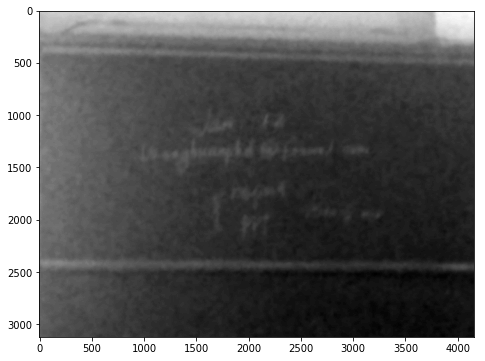

In [56]:
plt.figure(figsize=(8,6))
plt.imshow(gaussian_filter(b2,10.),cmap='gray')

In [48]:
ndimage.gaussian_filter?

(array([ 308090., 3577944., 3856968., 2568793., 1270789.,  351405.,
         442637.,  400416.,  162929.,   39229.]),
 array([ 83. ,  91.6, 100.2, 108.8, 117.4, 126. , 134.6, 143.2, 151.8,
        160.4, 169. ]),
 <a list of 10 Patch objects>)

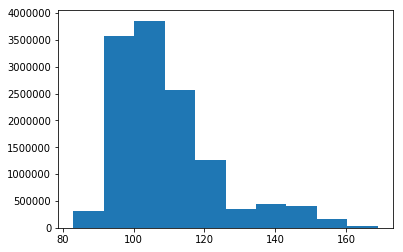

In [41]:
plt.hist(b2.ravel())

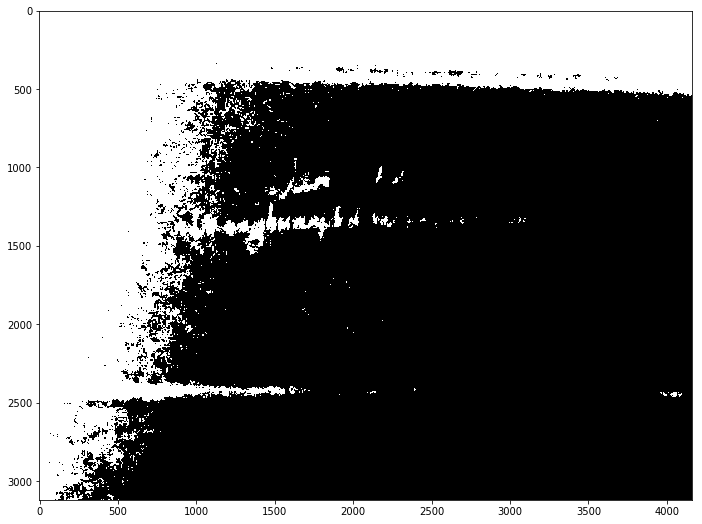

In [31]:
_b2 = b2.copy()
cut = 112
_b2[b2 >= cut] = 255
_b2[b2 < cut] = 0

plt.figure(figsize=(16,9))
plt.imshow(_b2, cmap='gray')

In [ ]:
img = np.g

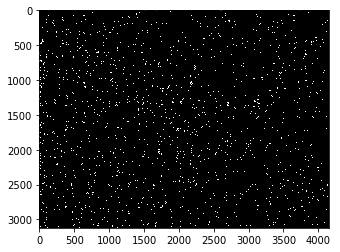

In [57]:
plt.imshow(convolve(gaussian_filter(b2,10.), [[1.0,-1.0]]),cmap='gray')

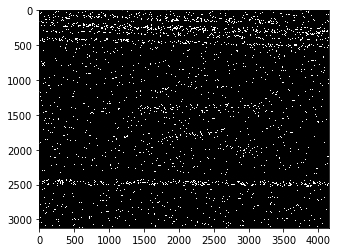

In [58]:
plt.imshow(convolve(gaussian_filter(b2,10.), [[1.0],[-1.0]]),cmap='gray')

In [66]:
row_s = convolve(gaussian_filter(b2,10.), [[1.0,-1.0]])
col_s = convolve(gaussian_filter(b2,10.), [[1.0],[-1.0]])
ss = np.sqrt(row_s**2 + col_s**2)

In [69]:
ss.dtype

dtype('float16')

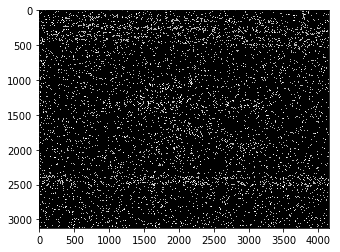

In [70]:
plt.imshow(ss.astype(np.float32), cmap='gray')

In [75]:
ss = np.sqrt(sobel(b2, axis=0)**2 + sobel(b2, axis=1)**2)

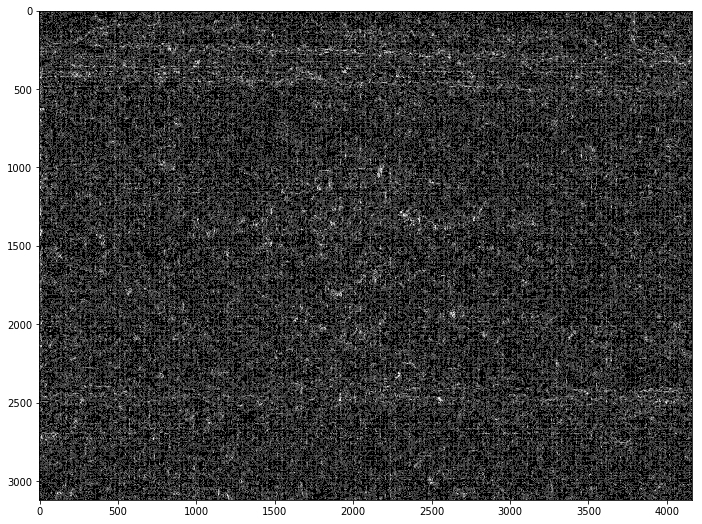

In [78]:
plt.figure(figsize=(16,9))
plt.imshow(ss.astype(np.float32), cmap='gray')

In [101]:
from numpy.fft import fft2,ifft2,fftshift,ifftshift

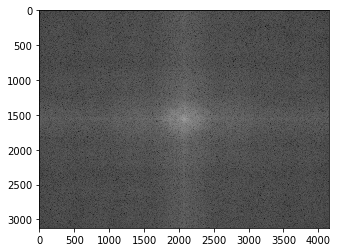

In [99]:
plt.imshow(np.log(1+np.abs(fftshift(fft2(b2)))), cmap='gray')

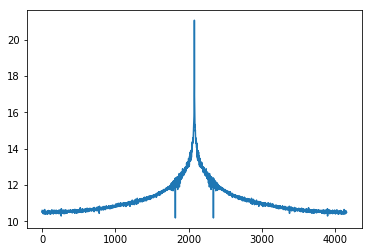

In [115]:
fft_b2 = fftshift(np.fft.fft2(b2))
m,n = fft_b2.shape
r=100
fft_b2_f = np.zeros_like(fft_b2)
fft_b2_f[m//2-r:m//2+r,n//2-r:n//2+r] = fft_b2[m//2-r:m//2+r,n//2-r:n//2+r]
b2_f = ifft2(ifftshift(fft_b2_f))

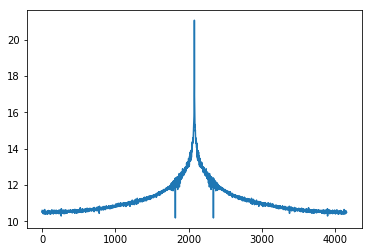

In [120]:
plt.plot(np.log(1+np.abs(fftshift(fft2(b2))))[m//2,:])

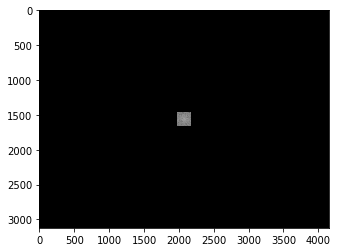

In [116]:
plt.imshow(np.log(1+np.abs(fft_b2_f)), cmap='gray')

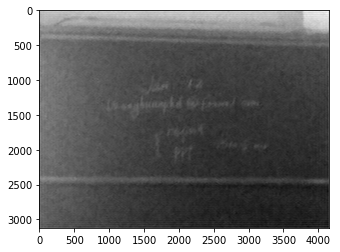

In [117]:
plt.imshow(np.abs(b2_f), cmap='gray')

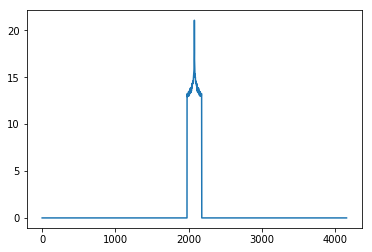

In [121]:
plt.plot(np.log(1+np.abs(fftshift(fft2(b2_f))))[m//2,:])

In [113]:
b2_f

array([[130.29642893+0.65875335j, 130.31536589+0.65998655j,
        130.33435064+0.66118013j, ..., 130.23991982+0.65481855j,
        130.25870442+0.65616908j, 130.27754128+0.65748077j],
       [130.62424255+0.65643977j, 130.64202222+0.65773571j,
        130.65985189+0.65899238j, ..., 130.57121763+0.65231901j,
        130.58883886+0.65373114j, 130.60651429+0.65510482j],
       [130.9518828 +0.65395306j, 130.96850337+0.65531163j,
        130.98517612+0.65663128j, ..., 130.90234744+0.64964666j,
        130.91880353+0.65112029j, 130.93531575+0.65255585j],
       ...,
       [129.31242265+0.66465444j, 129.33481914+0.66569889j,
        129.3572567 +0.66670263j, ..., 129.24549718+0.66127891j,
        129.26775993+0.66244422j, 129.29006899+0.66356947j],
       [129.64047153+0.66286071j, 129.66171703+0.66396815j,
        129.68300585+0.66503524j, ..., 129.57701174+0.65929858j,
        129.59811724+0.66052568j, 129.61927105+0.66171314j],
       [129.96848944+0.66089368j, 129.98858172+0.66206404j